# **Recherche en grille** : `CountVectorizer`

# Les jeux de données

In [1]:
from tx_pipeline import tx_ml_preprocess
names = ['product_name', 'description']
corpora = {}
for name in names:
    corpora[name] = tx_ml_preprocess(name)

# Réglages mono-paramètre

## Effet de `min_df`

Ce paramètre fait diminuer rapidement le nombre de caractéristiques, avec un coude bien marqué, tout en améliorant un peu la performance de la prédiction ainsi que le temps d'exécution.

Pour `product_name`, on obtient un ARI de 40% pour `min_df_range=12`.

### Sur `product_name`

In [13]:
from tx_pipeline import tx_ml_bow_count
import numpy as np
import pandas as pd
import itertools

name = 'product_name'
sents, cla_labels = corpora[name]

n = 30
min_df_range = 1 + np.arange(n)
#max_df_range = np.linspace(.95, .25, 5)
#max_ng_range = 1 + np.arange(10)
# ngram_ranges = sub_ranges(1 + np.arange(6))
print("min_df_range:", min_df_range)
#print("max_df_range:", max_df_range)
#print("max_ng_range:", max_ng_range)

#print("ngram_ranges:", ngram_ranges)

print("(min_df)\t=>   ARI  |   Time   | n_features")
rows = []
params_list = itertools.product(min_df_range)    # max_ng_range, max_df_range, 
for params in params_list:
    min_df, = params   # max_ng, max_df, 
    #print(f"{max_ng}, {max_df:.2f}, {min_df}", end=" => ")
    print(f"{min_df}", end="\t\t=> ")
    _, ari, dt, n_features = tx_ml_bow_count(
        sents, cla_labels, name,
        vectorizer_params={
            'min_df': min_df,
            #'max_df': max_df,
            #'ngram_range': (1, max_ng)
        },
        # verbosity=3
    )
    print(f"{ari:.4f} | {dt:.4f} s | {n_features}")
    rows.append((min_df, ari, dt, n_features))   #

gridsearch_data = pd.DataFrame(rows, columns=['min_df', 'ari', 'dt', 'n_features'])   #, 'max_df', 'max_ng'
display(gridsearch_data)

min_df_range: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
(min_df)	=>   ARI  |   Time   | n_features
1		=> 0.2973 | 8.2611 s | 5152
2		=> 0.2861 | 6.3784 s | 1133
3		=> 0.3086 | 6.0978 s | 648
4		=> 0.3112 | 5.8615 s | 453
5		=> 0.3211 | 5.7626 s | 343
6		=> 0.3256 | 6.3818 s | 290
7		=> 0.3097 | 6.5195 s | 241
8		=> 0.3180 | 6.1424 s | 199
9		=> 0.3067 | 6.9719 s | 164
10		=> 0.3769 | 6.5415 s | 140
11		=> 0.3033 | 5.7878 s | 115
12		=> 0.4034 | 6.2231 s | 101
13		=> 0.2940 | 6.6904 s | 91
14		=> 0.3194 | 6.0927 s | 82
15		=> 0.3463 | 6.4729 s | 77
16		=> 0.3273 | 6.6161 s | 69
17		=> 0.3117 | 5.5466 s | 64
18		=> 0.3331 | 5.5611 s | 62
19		=> 0.3304 | 5.3508 s | 59
20		=> 0.2884 | 5.4684 s | 57
21		=> 0.2300 | 5.4300 s | 54
22		=> 0.2212 | 5.1614 s | 50
23		=> 0.3222 | 5.4677 s | 40
24		=> 0.3060 | 5.4637 s | 38
25		=> 0.3021 | 5.3041 s | 36
26		=> 0.3021 | 5.2860 s | 36
27		=> 0.3032 | 5.3026 s | 32
28		=> 0.3136 | 5.2730 s | 31
29		=

,min_df,ari,dt,n_features
0,1,0.297269,8.261072,5152
1,2,0.286148,6.378374,1133
2,3,0.308647,6.097788,648
3,4,0.311212,5.861495,453
4,5,0.321111,5.762598,343
5,6,0.325614,6.381797,290
6,7,0.309663,6.519498,241
7,8,0.318029,6.142394,199
8,9,0.306661,6.971949,164
9,10,0.376934,6.541532,140


### Sur `description`

In [14]:
from pipeline import tx_ml_bow_count
import numpy as np
import pandas as pd
import itertools

name = 'description'
sents, cla_labels = corpora[name]

n = 30
min_df_range = 1 + np.arange(n)
#max_df_range = np.linspace(.95, .25, 5)
#max_ng_range = 1 + np.arange(10)
# ngram_ranges = sub_ranges(1 + np.arange(6))
print("min_df_range:", min_df_range)
#print("max_df_range:", max_df_range)
#print("max_ng_range:", max_ng_range)

#print("ngram_ranges:", ngram_ranges)

print("(min_df)\t=>   ARI  |   Time   | n_features")
rows = []
params_list = itertools.product(min_df_range)    # max_ng_range, max_df_range, 
for params in params_list:
    min_df, = params   # max_ng, max_df, 
    #print(f"{max_ng}, {max_df:.2f}, {min_df}", end=" => ")
    print(f"{min_df}", end="\t\t=> ")
    _, ari, dt, n_features = tx_ml_bow_count(
        sents, cla_labels, name,
        vectorizer_params={
            'min_df': min_df,
            #'max_df': max_df,
            #'ngram_range': (1, max_ng)
        },
        # verbosity=3
    )
    print(f"{ari:.4f} | {dt:.4f} s | {n_features}")
    rows.append((min_df, ari, dt, n_features))   #

gridsearch_data = pd.DataFrame(rows, columns=['min_df', 'ari', 'dt', 'n_features'])   #, 'max_df', 'max_ng'
display(gridsearch_data)

min_df_range: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
(min_df)	=>   ARI  |   Time   | n_features
1		=> 0.3354 | 9.9948 s | 23356
2		=> 0.3312 | 8.1956 s | 5863
3		=> 0.3665 | 7.4099 s | 3533
4		=> 0.3788 | 7.3325 s | 2527
5		=> 0.3835 | 8.4962 s | 2032
6		=> 0.3743 | 8.2720 s | 1677
7		=> 0.3545 | 8.2270 s | 1442
8		=> 0.3561 | 8.1950 s | 1221
9		=> 0.3522 | 7.9476 s | 1091
10		=> 0.3483 | 6.3938 s | 1012
11		=> 0.3533 | 7.3526 s | 873
12		=> 0.3578 | 7.5498 s | 730
13		=> 0.3534 | 7.5500 s | 625
14		=> 0.3366 | 6.3420 s | 583
15		=> 0.3085 | 6.6139 s | 542
16		=> 0.3096 | 7.5280 s | 500
17		=> 0.3276 | 7.0619 s | 468
18		=> 0.3285 | 7.4333 s | 436
19		=> 0.3369 | 8.1783 s | 417
20		=> 0.3404 | 7.1731 s | 394
21		=> 0.3354 | 7.4887 s | 380
22		=> 0.3469 | 7.1672 s | 334
23		=> 0.3739 | 8.4966 s | 310
24		=> 0.3689 | 7.5970 s | 292
25		=> 0.3561 | 6.4363 s | 280
26		=> 0.3478 | 6.6353 s | 263
27		=> 0.3389 | 6.4290 s | 250
28		=> 0.35

,min_df,ari,dt,n_features
0,1,0.335427,9.994839,23356
1,2,0.331176,8.195551,5863
2,3,0.366525,7.409902,3533
3,4,0.378804,7.332481,2527
4,5,0.383540,8.496191,2032
5,6,0.374302,8.272032,1677
6,7,0.354480,8.226965,1442
7,8,0.356132,8.194991,1221
8,9,0.352222,7.947606,1091
9,10,0.348300,6.393756,1012


<AxesSubplot:>

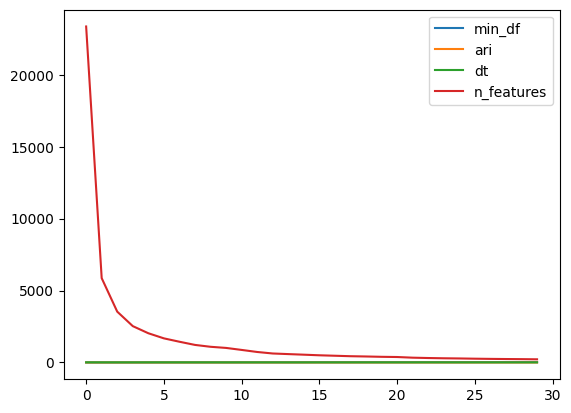

In [15]:
gridsearch_data.plot()

## Effet de `max_df`

Ce paramètre semble être sans effet.

Ce paramètre ne devrait pourtant être ignoré que si le paramètre `vocabulary` n'est pas `None`.

### Sur `product_name`

In [17]:
from pipeline import tx_ml_bow_count
import numpy as np
import pandas as pd
import itertools

name = 'product_name'
sents, cla_labels = corpora[name]

n = 10
# min_df_range = 1 + np.arange(n)
max_df_range = np.linspace(.95, .05, n)
#max_ng_range = 1 + np.arange(10)
# ngram_ranges = sub_ranges(1 + np.arange(6))
#print("min_df_range:", min_df_range)
print("max_df_range:", max_df_range)
#print("max_ng_range:", max_ng_range)

#print("ngram_ranges:", ngram_ranges)

print("(max_df)\t=>   ARI  |   Time   | n_features")
rows = []
params_list = itertools.product(max_df_range)    # max_ng_range, max_df_range, 
for params in params_list:
    max_df, = params   # max_ng, max_df, 
    #print(f"{max_ng}, {max_df:.2f}, {min_df}", end=" => ")
    print(f"{max_df:.2f}", end="\t\t=> ")
    _, ari, dt, n_features = tx_ml_bow_count(
        sents, cla_labels, name,
        vectorizer_params={
            #'min_df': min_df,
            'max_df': max_df,
            #'ngram_range': (1, max_ng)
        },
        # verbosity=3
    )
    print(f"{ari:.4f} | {dt:.4f} s | {n_features}")
    rows.append((max_df, ari, dt, n_features))   #

gridsearch_data = pd.DataFrame(rows, columns=['max_df', 'ari', 'dt', 'n_features'])   #, 'max_df', 'max_ng'
display(gridsearch_data)

max_df_range: [0.95 0.85 0.75 0.65 0.55 0.45 0.35 0.25 0.15 0.05]
(max_df)	=>   ARI  |   Time   | n_features
0.95		=> 0.2973 | 6.9676 s | 5152
0.85		=> 0.2973 | 6.4993 s | 5152
0.75		=> 0.2973 | 6.4267 s | 5152
0.65		=> 0.2973 | 6.7014 s | 5152
0.55		=> 0.2973 | 7.4596 s | 5152
0.45		=> 0.2973 | 7.3642 s | 5152
0.35		=> 0.2973 | 6.8051 s | 5152
0.25		=> 0.2973 | 6.4931 s | 5152
0.15		=> 0.2973 | 7.0303 s | 5152
0.05		=> 0.0504 | 6.9413 s | 5135


,max_df,ari,dt,n_features
0,0.95,0.297269,6.967606,5152
1,0.85,0.297269,6.499270,5152
2,0.75,0.297269,6.426675,5152
3,0.65,0.297269,6.701378,5152
4,0.55,0.297269,7.459611,5152
5,0.45,0.297269,7.364172,5152
6,0.35,0.297269,6.805100,5152
7,0.25,0.297269,6.493080,5152
8,0.15,0.297269,7.030316,5152
9,0.05,0.050448,6.941346,5135


### Sur `description`

In [18]:
from pipeline import tx_ml_bow_count
import numpy as np
import pandas as pd
import itertools

name = 'description'
sents, cla_labels = corpora[name]

n = 10
# min_df_range = 1 + np.arange(n)
max_df_range = np.linspace(.95, .05, n)
#max_ng_range = 1 + np.arange(10)
# ngram_ranges = sub_ranges(1 + np.arange(6))
#print("min_df_range:", min_df_range)
print("max_df_range:", max_df_range)
#print("max_ng_range:", max_ng_range)

#print("ngram_ranges:", ngram_ranges)

print("(max_df)\t=>   ARI  |   Time   | n_features")
rows = []
params_list = itertools.product(max_df_range)    # max_ng_range, max_df_range, 
for params in params_list:
    max_df, = params   # max_ng, max_df, 
    #print(f"{max_ng}, {max_df:.2f}, {min_df}", end=" => ")
    print(f"{max_df:.2f}", end="\t\t=> ")
    _, ari, dt, n_features = tx_ml_bow_count(
        sents, cla_labels, name,
        vectorizer_params={
            #'min_df': min_df,
            'max_df': max_df,
            #'ngram_range': (1, max_ng)
        },
        # verbosity=3
    )
    print(f"{ari:.4f} | {dt:.4f} s | {n_features}")
    rows.append((max_df, ari, dt, n_features))   #

gridsearch_data = pd.DataFrame(rows, columns=['max_df', 'ari', 'dt', 'n_features'])   #, 'max_df', 'max_ng'
display(gridsearch_data)

max_df_range: [0.95 0.85 0.75 0.65 0.55 0.45 0.35 0.25 0.15 0.05]
(max_df)	=>   ARI  |   Time   | n_features
0.95		=> 0.3354 | 9.9225 s | 23356
0.85		=> 0.3354 | 9.5637 s | 23356
0.75		=> 0.3354 | 9.7729 s | 23356
0.65		=> 0.3354 | 10.0302 s | 23356
0.55		=> 0.3288 | 9.5429 s | 23354
0.45		=> 0.3418 | 8.9469 s | 23342
0.35		=> 0.3047 | 8.1869 s | 23337
0.25		=> 0.2703 | 8.2321 s | 23333
0.15		=> 0.3224 | 8.1355 s | 23314
0.05		=> 0.0933 | 10.4897 s | 23222


,max_df,ari,dt,n_features
0,0.95,0.335427,9.922534,23356
1,0.85,0.335427,9.563684,23356
2,0.75,0.335427,9.772857,23356
3,0.65,0.335427,10.030209,23356
4,0.55,0.328773,9.542912,23354
5,0.45,0.341762,8.946887,23342
6,0.35,0.304664,8.186902,23337
7,0.25,0.270308,8.232060,23333
8,0.15,0.322392,8.135499,23314
9,0.05,0.093331,10.489672,23222


## Effet de `max_ng`

Ce paramètre semble fortement lié à `min_df`. Il démultiplie évidemment le nombre de caractéristiques, sans que cela améliore la performance, et même la dégrade plutôt. L'augmentation de nombre de caractéristiques atteint un plafond, d'autant plus rapidement de `min_df` est élevé.

C'est donc a priori un paramètre qu'il vaut mieux laisser à 1 (1-grammes).

### Sur `product_name`

In [23]:
from pipeline import tx_ml_bow_count
import numpy as np
import pandas as pd
import itertools

name = 'product_name'
sents, cla_labels = corpora[name]

n = 10
#min_df_range = 1 + np.arange(n)
#max_df_range = np.linspace(.95, .25, 5)
max_ng_range = 1 + np.arange(n)
# ngram_ranges = sub_ranges(1 + np.arange(6))
# print("min_df_range:", min_df_range)
#print("max_df_range:", max_df_range)
print("max_ng_range:", max_ng_range)

#print("ngram_ranges:", ngram_ranges)

print("(max_ng)\t=>   ARI  |   Time   | n_features")
rows = []
params_list = itertools.product(max_ng_range)    # max_ng_range, max_df_range, 
for params in params_list:
    max_ng, = params   # max_ng, max_df, 
    #print(f"{max_ng}, {max_df:.2f}, {min_df}", end=" => ")
    print(f"{max_ng}", end="\t\t=> ")
    _, ari, dt, n_features = tx_ml_bow_count(
        sents, cla_labels, name,
        vectorizer_params={
            'min_df': 3,
            #'max_df': max_df,
            'ngram_range': (1, max_ng)
        },
        # verbosity=3
    )
    print(f"{ari:.4f} | {dt:.4f} s | {n_features}")
    rows.append((max_ng, ari, dt, n_features))   #

gridsearch_data = pd.DataFrame(rows, columns=['max_ng', 'ari', 'dt', 'n_features'])   #, 'max_df', 'max_ng'
display(gridsearch_data)

max_ng_range: [ 1  2  3  4  5  6  7  8  9 10]
(max_ng)	=>   ARI  |   Time   | n_features
1		=> 0.3323 | 7.0564 s | 401
2		=> 0.3086 | 6.6571 s | 648
3		=> 0.2998 | 6.6930 s | 794
4		=> 0.2994 | 7.0349 s | 865
5		=> 0.3153 | 6.1340 s | 887
6		=> 0.3227 | 7.3830 s | 896
7		=> 0.3074 | 6.5885 s | 900
8		=> 0.2918 | 6.7501 s | 902
9		=> 0.3103 | 6.8472 s | 903
10		=> 0.3103 | 6.1898 s | 903


,max_ng,ari,dt,n_features
0,1,0.332269,7.056401,401
1,2,0.308647,6.657144,648
2,3,0.299792,6.692964,794
3,4,0.299352,7.034910,865
4,5,0.315290,6.134023,887
5,6,0.322660,7.382992,896
6,7,0.307425,6.588502,900
7,8,0.291774,6.750071,902
8,9,0.310321,6.847177,903
9,10,0.310321,6.189779,903


### Sur `description`

In [25]:
from pipeline import tx_ml_bow_count
import numpy as np
import pandas as pd
import itertools

name = 'description'
sents, cla_labels = corpora[name]

n = 10
#min_df_range = 1 + np.arange(n)
#max_df_range = np.linspace(.95, .25, 5)
max_ng_range = 1 + np.arange(n)
# ngram_ranges = sub_ranges(1 + np.arange(6))
# print("min_df_range:", min_df_range)
#print("max_df_range:", max_df_range)
print("max_ng_range:", max_ng_range)

#print("ngram_ranges:", ngram_ranges)

print("(max_ng)\t=>   ARI  |   Time   | n_features")
rows = []
params_list = itertools.product(max_ng_range)    # max_ng_range, max_df_range, 
for params in params_list:
    max_ng, = params   # max_ng, max_df, 
    #print(f"{max_ng}, {max_df:.2f}, {min_df}", end=" => ")
    print(f"{max_ng}", end="\t\t=> ")
    _, ari, dt, n_features = tx_ml_bow_count(
        sents, cla_labels, name,
        vectorizer_params={
            'min_df': 3,
            #'max_df': max_df,
            'ngram_range': (1, max_ng)
        },
        # verbosity=3
    )
    print(f"{ari:.4f} | {dt:.4f} s | {n_features}")
    rows.append((max_ng, ari, dt, n_features))   #

gridsearch_data = pd.DataFrame(rows, columns=['max_ng', 'ari', 'dt', 'n_features'])   #, 'max_df', 'max_ng'
display(gridsearch_data)

max_ng_range: [ 1  2  3  4  5  6  7  8  9 10]
(max_ng)	=>   ARI  |   Time   | n_features
1		=> 0.3945 | 8.0799 s | 1465
2		=> 0.3665 | 7.2306 s | 3533
3		=> 0.3624 | 8.7271 s | 5496
4		=> 0.3118 | 10.6678 s | 7292
5		=> 0.2913 | 10.8081 s | 8962
6		=> 0.2903 | 11.5532 s | 10508
7		=> 0.2615 | 12.3589 s | 11959
8		=> 0.2932 | 13.5935 s | 13323
9		=> 0.2890 | 13.8998 s | 14607
10		=> 0.3000 | 14.5214 s | 15822


,max_ng,ari,dt,n_features
0,1,0.394475,8.079941,1465
1,2,0.366525,7.230562,3533
2,3,0.362350,8.727070,5496
3,4,0.311769,10.667776,7292
4,5,0.291294,10.808079,8962
5,6,0.290319,11.553231,10508
6,7,0.261472,12.358874,11959
7,8,0.293182,13.593498,13323
8,9,0.288950,13.899766,14607
9,10,0.300034,14.521384,15822


# Code plus générique

In [ ]:
def grid_search(param_list, func):
    results = []
    param_combinations = itertools.product(*param_list)
    for params in param_combinations:
        result = func(*params)
        results.append(result)
    return pd.DataFrame(results)